In [223]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [170]:
# Input the data from the URL.
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
!wget $data # Get the data.

--2022-09-27 19:52:35--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.3’

housing.csv.3       100%[===================>]   1.36M  --.-KB/s    in 0.03s   

2022-09-27 19:52:36 (39.0 MB/s) - ‘housing.csv.3’ saved [1423529/1423529]



In [171]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [172]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [173]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [174]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [175]:
df.total_bedrooms=df['total_bedrooms'].fillna(0)

In [176]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Data Preparation
- Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
- Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
- Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [177]:
df['rooms_per_household'] =df.total_rooms/df.households 
df['bedrooms_per_room'] =df.total_bedrooms/df.total_rooms 
df['population_per_household'] =df.population/df.households 

In [178]:
df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


## Question 1
What is the most frequent observation (mode) for the column ocean_proximity?

In [179]:
df.ocean_proximity.mode()

0    <1H OCEAN
dtype: object

## Question 2


Create the correlation matrix for the numerical features of your train dataset.
What are the two features that have the biggest correlation in this dataset?

In [180]:
numerical = ['longitude', 'longitude',  'total_rooms', 'total_bedrooms','population', 'households', 'median_income', 'median_house_value', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'housing_median_age']
categorical = ['ocean_proximity']

In [181]:
df[numerical].corrwith(df.households).abs()


longitude                   0.055310
longitude                   0.055310
total_rooms                 0.918484
total_bedrooms              0.966507
population                  0.907222
households                  1.000000
median_income               0.013033
median_house_value          0.065843
rooms_per_household         0.080598
bedrooms_per_room           0.059818
population_per_household    0.027309
housing_median_age          0.302916
dtype: float64

In [182]:
df[numerical].corrwith(df.total_rooms).abs()

longitude                   0.044568
longitude                   0.044568
total_rooms                 1.000000
total_bedrooms              0.920196
population                  0.857126
households                  0.918484
median_income               0.198050
median_house_value          0.134153
rooms_per_household         0.133798
bedrooms_per_room           0.174583
population_per_household    0.024581
housing_median_age          0.361262
dtype: float64

Options:

- total_bedrooms and households
- total_bedrooms and total_rooms
- population and households
- population_per_household and total_rooms

***Solution: total_bedrooms and households***

Make median_house_value binary.


Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [183]:
df.median_house_value.mean()

206855.81690891474

In [184]:
df['above_average'] = (df.median_house_value > df.median_house_value.mean()).astype(int)
df['above_average'].value_counts(normalize=True)

0    0.59375
1    0.40625
Name: above_average, dtype: float64

In [185]:
categorical.append ('above_average')
categorical

['ocean_proximity', 'above_average']

In [186]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,20630,20631,20632,20633,20634,20635,20636,20637,20638,20639
longitude,-122.23,-122.22,-122.24,-122.25,-122.25,-122.25,-122.25,-122.25,-122.26,-122.25,...,-121.32,-121.4,-121.45,-121.53,-121.56,-121.09,-121.21,-121.22,-121.32,-121.24
latitude,37.88,37.86,37.85,37.85,37.85,37.85,37.84,37.84,37.84,37.84,...,39.29,39.33,39.26,39.19,39.27,39.48,39.49,39.43,39.43,39.37
housing_median_age,41.0,21.0,52.0,52.0,52.0,52.0,52.0,52.0,42.0,52.0,...,11.0,15.0,15.0,27.0,28.0,25.0,18.0,17.0,18.0,16.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0,919.0,2535.0,3104.0,2555.0,3549.0,...,2640.0,2655.0,2319.0,2080.0,2332.0,1665.0,697.0,2254.0,1860.0,2785.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0,213.0,489.0,687.0,665.0,707.0,...,505.0,493.0,416.0,412.0,395.0,374.0,150.0,485.0,409.0,616.0
population,322.0,2401.0,496.0,558.0,565.0,413.0,1094.0,1157.0,1206.0,1551.0,...,1257.0,1200.0,1047.0,1082.0,1041.0,845.0,356.0,1007.0,741.0,1387.0
households,126.0,1138.0,177.0,219.0,259.0,193.0,514.0,647.0,595.0,714.0,...,445.0,432.0,385.0,382.0,344.0,330.0,114.0,433.0,349.0,530.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462,4.0368,3.6591,3.12,2.0804,3.6912,...,3.5673,3.5179,3.125,2.5495,3.7125,1.5603,2.5568,1.7,1.8672,2.3886
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0,269700.0,299200.0,241400.0,226700.0,261100.0,...,112000.0,107200.0,115600.0,98300.0,116800.0,78100.0,77100.0,92300.0,84700.0,89400.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,...,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND


##Split the data
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (median_house_value) is not in your dataframe.

help on train_test_split

In [187]:
#train_test_split?

In [188]:
# first split 80-20
df_full_train, df_test = train_test_split (df, test_size=0.2, random_state=42) 

# Now, split 60-20 from this 80%
df_train, df_val = train_test_split (df_full_train, test_size=0.25, random_state=42)   # 20% of the total = 25% of the 80%

len (df), len (df_full_train), len (df_train), len(df_test),  len (df_val)

(20640, 16512, 12384, 4128, 4128)

Reset the index for each data frame.

In [189]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_full_train = df_full_train.reset_index(drop = True)


In [190]:
y_train=df_train.median_house_value.values
y_val=df_val.median_house_value.values
y_test=df_test.median_house_value.values
y_test

array([ 47700.,  45800., 500001., ..., 500001.,  72300., 151500.])

Delete target variable 

In [191]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### EDA

In [192]:
df_full_train.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
above_average               0
dtype: int64

In [193]:
df_full_train.median_house_value.value_counts()

500001.0    786
137500.0     93
162500.0     89
112500.0     82
187500.0     73
           ... 
149700.0      1
44600.0       1
399200.0      1
236600.0      1
420200.0      1
Name: median_house_value, Length: 3675, dtype: int64

In [194]:
df_full_train.median_house_value.value_counts(normalize=True)  # normalize argument to count the relative frequency of unique values in a pandas Series (give in percentage)

500001.0    0.047602
137500.0    0.005632
162500.0    0.005390
112500.0    0.004966
187500.0    0.004421
              ...   
149700.0    0.000061
44600.0     0.000061
399200.0    0.000061
236600.0    0.000061
420200.0    0.000061
Name: median_house_value, Length: 3675, dtype: float64

In [195]:
df_full_train.median_house_value.mode()

0    500001.0
dtype: float64

In [196]:
df_full_train.median_house_value.mean()

207194.6937378876

In [197]:
df_full_train.T

,0,1,2,3,4,5,6,7,8,9,...,16502,16503,16504,16505,16506,16507,16508,16509,16510,16511
longitude,-117.03,-118.16,-120.48,-117.11,-119.8,-121.86,-117.97,-122.53,-117.9,-117.79,...,-117.94,-117.23,-118.25,-122.42,-117.94,-117.96,-117.43,-118.38,-121.96,-122.42
latitude,32.71,33.77,34.66,32.69,36.78,37.42,34.04,37.91,34.13,34.02,...,33.74,32.81,34.07,37.62,34.05,33.78,34.02,34.03,37.58,37.77
housing_median_age,33.0,49.0,4.0,36.0,43.0,20.0,28.0,37.0,5.0,5.0,...,24.0,28.0,18.0,40.0,34.0,35.0,33.0,36.0,15.0,52.0
total_rooms,3126.0,3382.0,1897.0,1421.0,2382.0,5032.0,1686.0,2524.0,1126.0,18690.0,...,4248.0,1508.0,4297.0,1545.0,1729.0,1330.0,3084.0,2101.0,3575.0,4226.0
total_bedrooms,627.0,787.0,331.0,367.0,431.0,808.0,417.0,398.0,316.0,2862.0,...,840.0,263.0,1420.0,264.0,324.0,201.0,570.0,569.0,597.0,1315.0
population,2300.0,1314.0,915.0,1418.0,874.0,2695.0,1355.0,999.0,819.0,9427.0,...,3118.0,996.0,4332.0,756.0,1341.0,658.0,1753.0,1756.0,1777.0,2619.0
households,623.0,756.0,336.0,355.0,380.0,801.0,388.0,417.0,311.0,2777.0,...,798.0,267.0,1286.0,282.0,324.0,217.0,449.0,527.0,559.0,1242.0
median_income,3.2596,3.8125,4.1563,1.9425,3.5542,6.6227,2.5192,7.9892,1.5,6.4266,...,4.2222,3.8026,2.2545,4.4643,3.7708,6.37,3.05,2.9344,5.7192,2.5755
median_house_value,103000.0,382100.0,172600.0,93400.0,96500.0,264800.0,157300.0,500001.0,139800.0,315600.0,...,207200.0,270000.0,192500.0,308100.0,163500.0,229200.0,97800.0,222100.0,283500.0,325000.0
ocean_proximity,NEAR OCEAN,NEAR OCEAN,NEAR OCEAN,NEAR OCEAN,INLAND,<1H OCEAN,<1H OCEAN,NEAR BAY,<1H OCEAN,<1H OCEAN,...,<1H OCEAN,NEAR OCEAN,<1H OCEAN,NEAR OCEAN,<1H OCEAN,<1H OCEAN,INLAND,<1H OCEAN,<1H OCEAN,NEAR BAY


In [198]:
df_full_train.above_average.value_counts()

0    9779
1    6733
Name: above_average, dtype: int64

In [199]:
df_full_train.above_average.value_counts(normalize=True)  # "above_average" rate


0    0.592236
1    0.407764
Name: above_average, dtype: float64

In [200]:
df_full_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household', 'above_average'],
      dtype='object')

In [201]:
df_full_train[categorical].nunique()

ocean_proximity    5
above_average      2
dtype: int64

In [202]:
df_full_train["above_average"].nunique()

2

## Question 3
- Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
- What is the value of mutual information?
- Round it to 2 decimal digits using round(score, 2)

In [203]:
df_full_train.above_average.mean()

0.4077640503875969

In [204]:
def mutual_info_series_score(series):
    return mutual_info_score(series, df_full_train.above_average)

mi = df_full_train[['ocean_proximity']].apply(mutual_info_series_score)
mi = round (mi,2)
mi.sort_values(ascending=False)


ocean_proximity    0.1
dtype: float64

### Question 4
Train a logistic regression
- Remember that we have one categorical variable ocean_proximity in the data.  - Include it using one-hot encoding.
- Fit the model on the training dataset.
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

### *One-hot Encoding*

In [205]:
numerical.remove('median_house_value')


In [206]:
numerical + categorical

['longitude',
 'longitude',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household',
 'housing_median_age',
 'ocean_proximity',
 'above_average']

In [207]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
X_train [3]


array([ 1.00000000e+00,  1.94158437e-01,  9.15000000e+02,  9.00000000e+00,
        3.42400000e+01, -1.18630000e+02,  4.83330000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.88400000e+03,  2.05901639e+00,  5.20109290e+00,  9.24000000e+02,
        4.75900000e+03])

In [208]:
dv.vocabulary_  # show mapping

{'longitude': 5,
 'latitude': 4,
 'housing_median_age': 3,
 'total_rooms': 16,
 'total_bedrooms': 15,
 'population': 12,
 'households': 2,
 'median_income': 6,
 'ocean_proximity=<1H OCEAN': 7,
 'rooms_per_household': 14,
 'bedrooms_per_room': 1,
 'population_per_household': 13,
 'above_average': 0,
 'ocean_proximity=NEAR OCEAN': 11,
 'ocean_proximity=INLAND': 8,
 'ocean_proximity=NEAR BAY': 10,
 'ocean_proximity=ISLAND': 9}

In [209]:
dv.get_feature_names_out()

array(['above_average', 'bedrooms_per_room', 'households',
       'housing_median_age', 'latitude', 'longitude', 'median_income',
       'ocean_proximity=<1H OCEAN', 'ocean_proximity=INLAND',
       'ocean_proximity=ISLAND', 'ocean_proximity=NEAR BAY',
       'ocean_proximity=NEAR OCEAN', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)

In [210]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)                              # WE DONT FIT ON VALIDATION DATA SET (why?)
X_val[0]

array([ 0.00000000e+00,  1.59529807e-01,  1.82000000e+02,  3.50000000e+01,
        3.67400000e+01, -1.19850000e+02,  3.53750000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.37000000e+02,  2.95054945e+00,  6.54395604e+00,  1.90000000e+02,
        1.19100000e+03])

### Logistic Regression

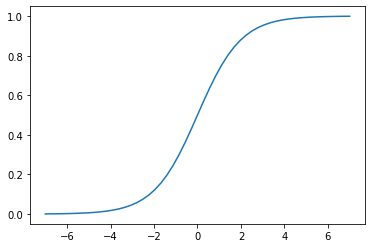

In [211]:
# define and graph sigmoid function  (Defined for reference, but will actually use sklearn for the implementation)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-7, 7, 51)
plt.plot(z, sigmoid(z))


In [212]:
# define linear regression  (Defined for reference, but will actually use sklearn for the implementation)
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [213]:
# define logistic regression  (Defined for reference, but will actually use sklearn for the implementation)
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

In [214]:
# Actual implementation (takes +10 min in google collab):
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [215]:
model.intercept_[0]

0.001691512544623076

In [216]:
model.coef_[0].round(3)   # these are the weights

array([-0.134, -0.009, -0.034, -0.053,  0.831,  0.255, -0.592, -0.201,
        0.344, -0.   , -0.096, -0.045,  0.002, -0.329, -0.049,  0.045,
       -0.013])

In [217]:
model.predict(X_val)  # "Hard" predictions; either yes or no/1 or 0

array([112500.,  87500., 500001., ..., 500001., 500001., 162500.])

In [218]:
model.predict_proba(X_val)[:, 1]   # "Soft" predictions; predicts a probability, from 0 to 1
# 2 column mantrix; first one is probability for "0", 2nd one for probability of "1"

array([4.08779575e-06, 2.94886465e-07, 1.06268085e-16, ...,
       2.21817151e-12, 2.50258767e-12, 8.34542828e-07])

In [219]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([4.08779575e-06, 2.94886465e-07, 1.06268085e-16, ...,
       2.21817151e-12, 2.50258767e-12, 8.34542828e-07])

In [220]:
decision = (y_pred >= 0.5)
df_val[decision].T

""
longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
ocean_proximity
rooms_per_household


In [221]:
#decision.asType(int)

AttributeError: ignored

In [ ]:
#(y_val  == decision).mean()


In [ ]:
#df_pred = pd.DataFrame()
#df_pred['probability'] = y_pred
#df_pred['prediction'] = decision.astype(int)
#df_pred['actual'] = y_val

#df_pred['correct'] = df_pred.prediction == df_pred.actual

#df_pred.correct.mean()

#decision.astype(int)

In [224]:
y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(np.round(accuracy, 2))

0.06
